# Check the Sigma

## Import the data and libraries

In [1]:
import os
cwd = os.getcwd()
print(cwd)

chdir=os.chdir("D:\Folder D/New folder/WERK Student/")
print(chdir)

C:\Users\alihi
None


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import csv

In [3]:
data1=pd.read_csv('FoodMart-Transactions-1997.csv', header=0)
data2=pd.read_csv('FoodMart-Transactions-1998.csv',header=0)

## Expolartry Data Analysis

In [4]:
data=pd.concat([data1,data2],ignore_index=True)

In [5]:
print(data.info())
data= data.drop(['stock_date'],axis=1)
#print(data.set_index('transaction_date'))
#data.reset_index(inplace=True)
#data['transaction_date'] = pd.to_datetime(data['transaction_date'])
#data = data.set_index('transaction_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  269720 non-null  object
 1   stock_date        269720 non-null  object
 2   product_id        269720 non-null  int64 
 3   customer_id       269720 non-null  int64 
 4   store_id          269720 non-null  int64 
 5   quantity          269720 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ MB
None


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269720 entries, 0 to 269719
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  269720 non-null  object
 1   product_id        269720 non-null  int64 
 2   customer_id       269720 non-null  int64 
 3   store_id          269720 non-null  int64 
 4   quantity          269720 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 10.3+ MB
None


In [7]:
print(data.head(5))

  transaction_date  product_id  customer_id  store_id  quantity
0         1/1/1997         869         3449         6         5
1         1/1/1997        1472         3449         6         3
2         1/1/1997          76         3449         6         4
3         1/1/1997         320         3449         6         3
4         1/1/1997           4         3449         6         4


In [8]:
print(data.describe)

<bound method NDFrame.describe of        transaction_date  product_id  customer_id  store_id  quantity
0              1/1/1997         869         3449         6         5
1              1/1/1997        1472         3449         6         3
2              1/1/1997          76         3449         6         4
3              1/1/1997         320         3449         6         3
4              1/1/1997           4         3449         6         4
...                 ...         ...          ...       ...       ...
269715       12/30/1998        1521         7197        11         3
269716       12/30/1998        1536         5223        10         2
269717       12/30/1998        1542         8077        10         4
269718       12/30/1998        1544         4485        10         2
269719       12/30/1998        1549         5223        10         3

[269720 rows x 5 columns]>


In [9]:
print(data['product_id'].value_counts())

382     225
502     219
426     218
1362    216
865     214
       ... 
113     132
257     129
1551    124
1        85
1559     80
Name: product_id, Length: 1559, dtype: int64


In [10]:
# The 5 products ID that will be decomposed and try to adjust the new sigma on
print('The Highest number of Ordered product is',data['product_id'].value_counts().index[0])
print('The lowest number of Ordered product is',data['product_id'].value_counts().index[-1])
print('The Middle number of Ordered product is',data['product_id'].value_counts().index[780])
print('The 25% of Ordered product is',data['product_id'].value_counts().index[1170])
print('The 75% of Ordered product is',data['product_id'].value_counts().index[390])

The Highest number of Ordered product is 382
The lowest number of Ordered product is 1559
The Middle number of Ordered product is 1319
The 25% of Ordered product is 450
The 75% of Ordered product is 88


## Split and Filter the data into the Transaction Date and Quanitiy of each product alone

### Highest Ordered Product

In [11]:
df_high=data[data.product_id==382]
print(df_high)

       transaction_date  product_id  customer_id  store_id  quantity
283            1/2/1997         382         8577        23         4
2094          1/11/1997         382         4543        13         2
2195          1/11/1997         382         8373        13         3
4657          1/20/1997         382         9170         7         4
4991          1/20/1997         382         2198        13         3
...                 ...         ...          ...       ...       ...
267056       12/24/1998         382         6394         8         4
267353       12/25/1998         382         1550        10         2
267354       12/25/1998         382         4096         3         2
267867       12/26/1998         382          354        23         4
267868       12/26/1998         382         1636        12         2

[225 rows x 5 columns]


In [12]:
# AS we can see this product had 225 times to be ordered
df_high=df_high.drop(['product_id','customer_id','store_id'],axis=1)
print(df_high.head())

     transaction_date  quantity
283          1/2/1997         4
2094        1/11/1997         2
2195        1/11/1997         3
4657        1/20/1997         4
4991        1/20/1997         3


In [13]:
df_high['transaction_date'] = pd.to_datetime(df_high['transaction_date'])
df_high = df_high.set_index('transaction_date')

### Lowest Ordered Product

In [14]:
df_low=data[data.product_id==1559]
print(df_low)

       transaction_date  product_id  customer_id  store_id  quantity
375            1/3/1997        1559         4544         7         3
5371          1/21/1997        1559         1533         3         3
7194           2/2/1997        1559         5977        15         2
7701           2/3/1997        1559         2224        16         4
9140          2/11/1997        1559          880        11         2
...                 ...         ...          ...       ...       ...
260761       12/12/1998        1559         3941         3         3
261099       12/13/1998        1559         3494         5         2
262462       12/16/1998        1559         5317        15         2
262463       12/16/1998        1559         8958        22         2
268798       12/27/1998        1559         7437        19         3

[80 rows x 5 columns]


In [15]:
# AS we can see this product had 80 times to be ordered
df_low=df_low.drop(['product_id','customer_id','store_id'],axis=1)
print(df_low.head())

     transaction_date  quantity
375          1/3/1997         3
5371        1/21/1997         3
7194         2/2/1997         2
7701         2/3/1997         4
9140        2/11/1997         2


In [16]:
df_low['transaction_date'] = pd.to_datetime(df_low['transaction_date'])
df_low = df_low.set_index('transaction_date')

### Middle Ordered Product

In [17]:
df_mid=data[data.product_id==1319]
print(df_mid)

       transaction_date  product_id  customer_id  store_id  quantity
1340           1/7/1997        1319         5329        13         4
2256          1/11/1997        1319         2548        13         4
2705          1/11/1997        1319         8138        24         4
2894          1/12/1997        1319        10022         7         3
3745          1/16/1997        1319         4069        17         2
...                 ...         ...          ...       ...       ...
265702       12/22/1998        1319         1937        24         4
267692       12/25/1998        1319         4064        24         4
267693       12/25/1998        1319         9349        10         3
267694       12/25/1998        1319         8947         3         3
269341       12/29/1998        1319         8364         4         2

[172 rows x 5 columns]


In [18]:
# AS we can see this product had 172 times to be ordered
df_mid=df_mid.drop(['product_id','customer_id','store_id'],axis=1)
print(df_mid.head())

     transaction_date  quantity
1340         1/7/1997         4
2256        1/11/1997         4
2705        1/11/1997         4
2894        1/12/1997         3
3745        1/16/1997         2


In [19]:
df_mid['transaction_date'] = pd.to_datetime(df_mid['transaction_date'])
df_mid = df_mid.set_index('transaction_date')

### 25%of the Ordered Product

In [20]:
df_per=data[data.product_id==450]
print(df_per)

       transaction_date  product_id  customer_id  store_id  quantity
3042          1/13/1997         450         4439        15         3
11373         2/17/1997         450         7975         6         5
13186         2/25/1997         450         8108        17         2
17524         3/17/1997         450         9524         3         3
18473         3/20/1997         450         4858        17         2
...                 ...         ...          ...       ...       ...
254798        12/7/1998         450         1259        12         3
254799        12/7/1998         450         1871        12         2
257170        12/9/1998         450          838         4         3
262756       12/17/1998         450         8915        12         2
267064       12/24/1998         450         6440         8         3

[163 rows x 5 columns]


In [21]:
# AS we can see this product had 163 times to be ordered
df_per=df_per.drop(['product_id','customer_id','store_id'],axis=1)
print(df_per.head())

      transaction_date  quantity
3042         1/13/1997         3
11373        2/17/1997         5
13186        2/25/1997         2
17524        3/17/1997         3
18473        3/20/1997         2


In [22]:
df_per['transaction_date'] = pd.to_datetime(df_per['transaction_date'])
df_per = df_per.set_index('transaction_date')

### 75% of the Ordered Product

In [23]:
df_ver=data[data.product_id==88]
print(df_ver)

       transaction_date  product_id  customer_id  store_id  quantity
560            1/5/1997          88         8782         7         3
2409          1/11/1997          88         3153        13         2
3788          1/16/1997          88         1874        17         3
4054          1/17/1997          88         3425        11         2
4239          1/17/1997          88         4524        24         4
...                 ...         ...          ...       ...       ...
261128       12/14/1998          88         1805         1         4
267250       12/25/1998          88         4064        24         3
268174       12/27/1998          88         7437        19         3
268803       12/28/1998          88         4030         6         3
268965       12/29/1998          88         4202         4         4

[184 rows x 5 columns]


In [24]:
# AS we can see this product had 184 times to be ordered
df_ver=df_ver.drop(['product_id','customer_id','store_id'],axis=1)
print(df_ver.head())

     transaction_date  quantity
560          1/5/1997         3
2409        1/11/1997         2
3788        1/16/1997         3
4054        1/17/1997         2
4239        1/17/1997         4


In [25]:
df_ver['transaction_date'] = pd.to_datetime(df_ver['transaction_date'])
df_ver = df_ver.set_index('transaction_date')

## Decompose the Data on the Selected Products

### Highest product

In [26]:
s_high=sm.tsa.seasonal_decompose(df_high,freq=24,model='additive',extrapolate_trend='freq')

<ipython-input-26-b11fc108e33c>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_high=sm.tsa.seasonal_decompose(df_high,freq=24,model='additive',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

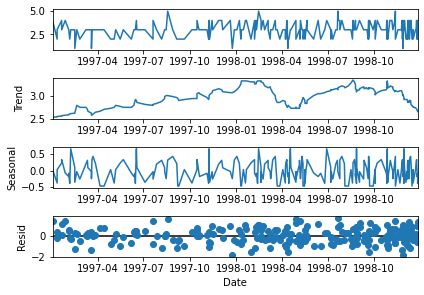

In [27]:
# Plot decomposition
fig = plt.figure()
s_high.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

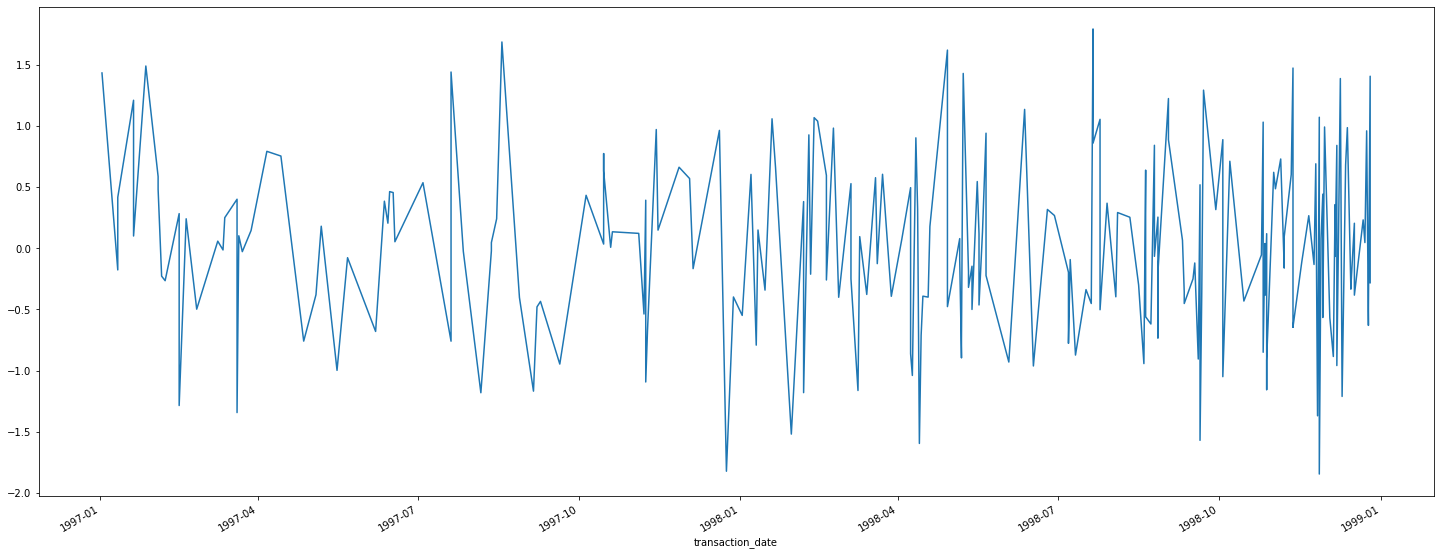

In [28]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_high.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [29]:
print('the Standarad Deviation of the Demand data is', np.std(s_high.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_high.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_high.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_high.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_high.resid)+np.std(s_high.seasonal)+np.std(s_high.trend))
# Ways to Get the SD along with the variance
SD= np.sqrt(np.var(s_high.resid))
print(np.sqrt(np.std(s_high.resid)**2))
print(SD)

#Ways to get the variance along with the SD
print(np.std(s_high.resid)**2)
print(np.var(s_high.resid))

the Standarad Deviation of the Demand data is 0.8055363982396381
the Standarad Deviation of the Error of the decomposed data is 0.7271895460746968
the Standarad Deviation of the Seasonal of the decomposed data is 0.28941727964569347
the Standarad Deviation of the Trend of the decomposed data is 0.20854699726070736
the  Combined Standarad Deviation of the decomposed data is 1.2251538229810977
0.7271895460746968
0.7271895460746968
0.5288046359203236
0.5288046359203236


In [30]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_high=225
n2_high=225
n3_high=225
com_count_high=n1_high+n2_high+n3_high
print('The Combined Untis are',com_count_high)
x1_high= np.mean(s_high.seasonal)
print('The mean of the Seasonal is',x1_high)
x2_high=np.mean(s_high.resid)
print('The mean of the Residuals is',x2_high)
x3_high= np.mean(s_high.trend)
print('The mean of the Trend is',x3_high)
s1_high=np.std(s_high.seasonal)**2
print('The Variance of the Seasonal is',s1_high)
s2_high=np.std(s_high.resid)**2
print('The Variance of the Residuals is',s2_high)
s3_high=np.std(s_high.trend)**2
print('The Variance of the Trend is',s3_high)
com_mean_high=(n1_high*x1_high+n2_high*x2_high+n3_high*x3_high)/(n1_high+n2_high+n3_high)
print('The compound mean is',com_mean_high)
result1_high=n1_high*(s1_high+(x1_high-com_mean_high)**2)
print('The Deviation of the Seasonal is',result1_high)
result2_high=n2_high*(s2_high+(x2_high-com_mean_high)**2)
print('The Deviation of the Residual is',result2_high)
result3_high=n3_high*(s3_high+(x3_high-com_mean_high)**2)
print('The Deviation of the Trend is',result3_high)
new_sd_high= (result1_high+result2_high+result3_high)/com_count_high
print('The SD of after Calculating it Manually is',new_sd_high)

The Combined Untis are 675
The mean of the Seasonal is -0.0020416004092860983
The mean of the Residuals is 0.02492718817096077
The mean of the Trend is 2.9771144122383246
The Variance of the Seasonal is 0.08376236175751353
The Variance of the Residuals is 0.5288046359203236
The Variance of the Trend is 0.043491850066457484
The compound mean is 0.9999999999999998
The Deviation of the Seasonal is 244.76618940937118
The Deviation of the Residual is 332.9036154649152
The Deviation of the Trend is 889.3064810580647
The SD of after Calculating it Manually is 2.173298201381261


In [31]:
# Example
n1=50
n2=40
com_count=n1+n2
print(com_count)
x1=63
x2=54
s1=81
s2=36
com_mean=(n1*x1+n2*x2)/(n1+n2)
print(com_mean)
result1=n1*(s1+(x1-com_mean)**2)
print(result1)
result2=n2*(s2+(x2-com_mean)**2)
print(result2)
new_sd= (result1+result2)/com_count
print(new_sd)

90
59.0
4850.0
2440.0
81.0


In [32]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand, I believe
# because of the NaN data on the Error and the Trend
print('The mean of the demand is',np.mean(df_high))
print('The highest demand of is',df_high.max())
Seas_high= df_high.max()/np.mean(df_high)
print('The Seasonal Fraction is',Seas_high)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_high.resid)*Seas_high*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.0
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.666667
dtype: float64
The new Standard Deviation is quantity    1.333181
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [33]:
# The seasonal data
print(s_high.seasonal)

transaction_date
1997-01-02    0.030022
1997-01-11   -0.369526
1997-01-11    0.028843
1997-01-20    0.227212
1997-01-20    0.327664
                ...   
1998-12-24    0.327664
1998-12-25   -0.069801
1998-12-25   -0.175599
1998-12-26   -0.079314
1998-12-26   -0.378862
Name: seasonal, Length: 225, dtype: float64


In [34]:
# Convert the Seasonal data into Dataframe
s_high.seasonal
print(len(s_high.seasonal))
sea_high=pd.DataFrame(s_high.seasonal)
print(sea_high)

225
                  seasonal
transaction_date          
1997-01-02        0.030022
1997-01-11       -0.369526
1997-01-11        0.028843
1997-01-20        0.227212
1997-01-20        0.327664
...                    ...
1998-12-24        0.327664
1998-12-25       -0.069801
1998-12-25       -0.175599
1998-12-26       -0.079314
1998-12-26       -0.378862

[225 rows x 1 columns]


##### Residuals

In [35]:
# Convert the residual data into Dataframe
print(len(s_high.resid))
res_high=np.array(s_high.resid)
print(res_high)
res_high=pd.DataFrame(res_high,columns=['Error'])
print(res_high)

225
[ 1.43153256 -0.17751544  0.41551988  1.20855521  0.0995072   1.48837586
  0.58557785  0.48069651 -0.2283515  -0.2655143   0.28240035 -1.28542574
  0.24020497 -0.49822096  0.0573346  -0.01442466  0.24946423  0.39992719
 -1.34312837  0.10131608 -0.02831355  0.14452797  0.79121879  0.75272442
 -0.75918906 -0.38047438  0.17949029 -0.99804503 -0.07766369 -0.68019902
  0.38393232  0.20431366  0.462195    0.45446154  0.05263888  0.53507547
 -0.75979503  1.43927904 -0.02599874 -1.18109133 -0.02136911  0.04576052
  0.24020497  1.68464941 -0.40331355 -1.16797203 -0.47961455 -0.43477558
 -0.94668906  0.43202562  0.03365696  0.7727883   0.63066964  0.00730098
  0.13393232  0.12098033 -0.537805    0.39196154 -1.09319446 -0.67325786
  0.96937163  0.14761237  0.66150126  0.56890867 -0.16720244  0.96242719
 -1.82229503 -0.39868392 -0.54914689  0.6028613  -0.79211455  0.14855776
 -0.34252239  1.05702562  0.65865696 -1.51887837  0.38066964 -1.18019902
  0.92559899 -0.21235301  1.06636167  1.0377948

In [36]:
# There is 24 not available data for the residuals
print(res_high.info())
print(type(res_high))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   225 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [37]:
# Convert the Trend data into Dataframe
print(len(s_high.trend))
tre_high=np.array(s_high.trend)
print(tre_high)
tre_high=pd.DataFrame(tre_high,columns=['Trend'])
print(tre_high)

225
[2.53844505 2.54704106 2.55563708 2.56423309 2.57282911 2.58142512
 2.59002114 2.59861715 2.60721316 2.61580918 2.62440519 2.63300121
 2.79166667 2.75       2.75       2.70833333 2.66666667 2.625
 2.58333333 2.58333333 2.60416667 2.64583333 2.66666667 2.70833333
 2.72916667 2.75       2.79166667 2.77083333 2.75       2.75
 2.79166667 2.875      2.91666667 2.89583333 2.85416667 2.8125
 2.79166667 2.8125     2.83333333 2.875      2.9375     2.97916667
 3.         3.         2.97916667 2.95833333 2.9375     2.89583333
 2.91666667 2.9375     2.9375     3.         3.04166667 3.0625
 3.04166667 2.95833333 2.91666667 2.95833333 3.         3.02083333
 3.0625     3.10416667 3.14583333 3.125      3.08333333 3.0625
 3.0625     3.08333333 3.125      3.1875     3.25       3.3125
 3.3125     3.3125     3.3125     3.29166667 3.29166667 3.25
 3.25       3.29166667 3.3125     3.3125     3.3125     3.3125
 3.29166667 3.27083333 3.20833333 3.16666667 3.16666667 3.1875
 3.14583333 3.0625     3.       

In [38]:
# There is 24 not available data for the residuals
print(tre_high.info())
print(type(tre_high))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   225 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [39]:
csv_high= pd.concat([sea_high,df_high],axis=1)
print(csv_high)

                  seasonal  quantity
transaction_date                    
1997-01-02        0.030022         4
1997-01-11       -0.369526         2
1997-01-11        0.028843         3
1997-01-20        0.227212         4
1997-01-20        0.327664         3
...                    ...       ...
1998-12-24        0.327664         4
1998-12-25       -0.069801         2
1998-12-25       -0.175599         2
1998-12-26       -0.079314         4
1998-12-26       -0.378862         2

[225 rows x 2 columns]


In [40]:
csv_high=csv_high.reset_index()
print(csv_high)
new_csv_high= pd.concat([csv_high,res_high,tre_high],axis=1)
print(new_csv_high.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-02  0.030022         4
1         1997-01-11 -0.369526         2
2         1997-01-11  0.028843         3
3         1997-01-20  0.227212         4
4         1997-01-20  0.327664         3
..               ...       ...       ...
220       1998-12-24  0.327664         4
221       1998-12-25 -0.069801         2
222       1998-12-25 -0.175599         2
223       1998-12-26 -0.079314         4
224       1998-12-26 -0.378862         2

[225 rows x 3 columns]
   transaction_date  seasonal  quantity     Error     Trend
50       1997-10-15  0.028843         3  0.033657  2.937500
51       1997-10-15  0.227212         4  0.772788  3.000000
52       1997-10-15  0.327664         4  0.630670  3.041667
53       1997-10-19 -0.069801         3  0.007301  3.062500
54       1997-10-20 -0.175599         3  0.133932  3.041667
55       1997-11-04 -0.079314         3  0.120980  2.958333
56       1997-11-07 -0.378862         2 -0.537805  2.916667
57  

In [41]:
new_csv_high['Added_Demand']= new_csv_high['seasonal']+new_csv_high['Error']+new_csv_high['Trend']
new_csv_high['Multiplied_Demand']= new_csv_high['seasonal']*new_csv_high['Error']*new_csv_high['Trend']

In [42]:
new_csv_high['quantity']=new_csv_high['quantity'].astype('str')
new_csv_high['Added_Demand']= new_csv_high['Added_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_high[['quantity','Added_Demand']])

    quantity Added_Demand
0          4          4.0
1          2          2.0
2          3          3.0
3          4          4.0
4          3          3.0
5          4          4.0
6          3          3.0
7          3          3.0
8          2          2.0
9          3          3.0
10         3          3.0
11         1          1.0
12         3          3.0
13         2          2.0
14         3          3.0
15         3          3.0
16         3          3.0
17         3          3.0
18         1          1.0
19         3          3.0
20         3          3.0
21         3          3.0
22         3          3.0
23         3          3.0
24         2          2.0
25         2          2.0
26         3          3.0
27         2          2.0
28         3          3.0
29         2          2.0
30         3          3.0
31         3          3.0
32         3          3.0
33         4          4.0
34         3          3.0
35         3          3.0
36         2          2.0
37         4

In [43]:
# Save the Data into CSV
new_csv_high.to_csv(r'/csv_High_product.csv')

### Lowest product

In [44]:
s_low=sm.tsa.seasonal_decompose(df_low.quantity,freq=24, model='additive',extrapolate_trend='freq')

<ipython-input-44-5f986635181f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_low=sm.tsa.seasonal_decompose(df_low.quantity,freq=24, model='additive',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

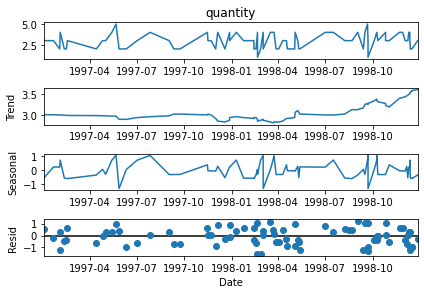

In [45]:
# Plot decomposition
fig = plt.figure()
s_low.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

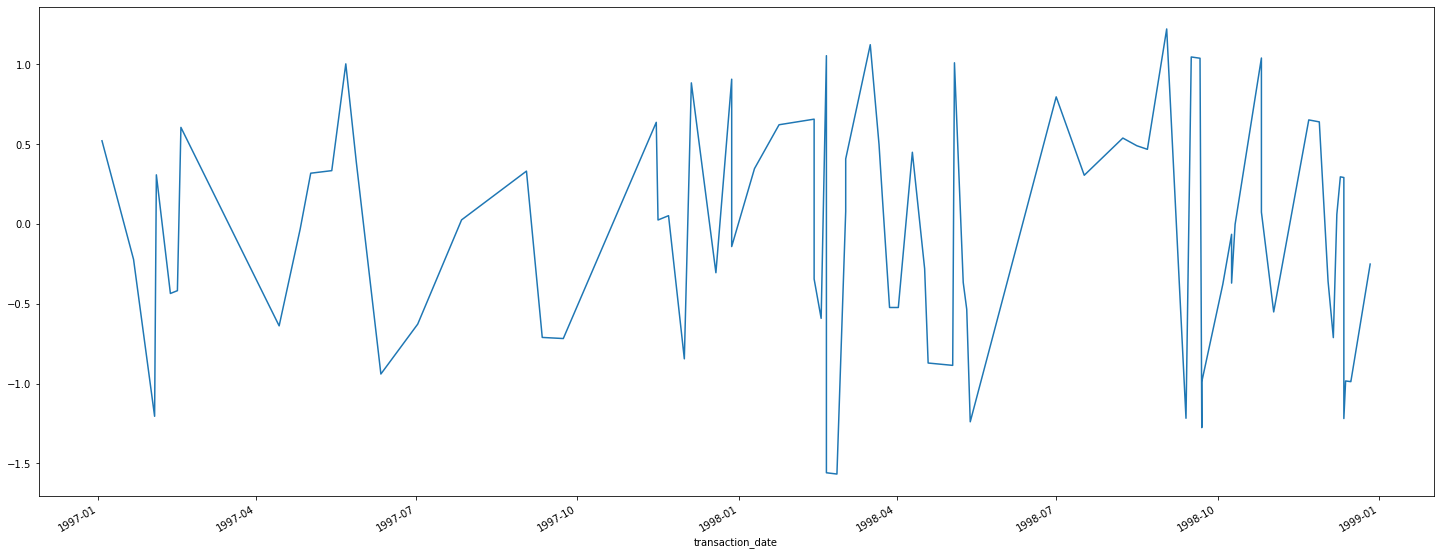

In [46]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_low.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [47]:
print('the Standarad Deviation of the Demand data is', np.std(s_low.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_low.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_low.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_low.trend))
#print('the  Combined Standarad Deviation of the decomposed data is', 
 #     np.std(s_low.resid)+np.std(s_low.seasonal)+np.std(s_low.trend))

the Standarad Deviation of the Demand data is 0.8944271909999159
the Standarad Deviation of the Error of the decomposed data is 0.7135317078739032
the Standarad Deviation of the Seasonal of the decomposed data is 0.5435146324151898
the Standarad Deviation of the Trend of the decomposed data is 0.21850362962206782


In [48]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_low=80
n2_low=80
n3_low=80
com_count_low=n1_low+n2_low+n3_low
print('The Combined Untis are',com_count_low)
x1_low= np.mean(s_low.seasonal)
print('The mean of the Seasonal is',x1_low)
x2_low=np.mean(s_low.resid)
print('The mean of the Residuals is',x2_low)
x3_low= np.mean(s_low.trend)
print('The mean of the Trend is',x3_low)
s1_low=np.std(s_low.seasonal)**2
print('The Variance of the Seasonal is',s1_low)
s2_low=np.std(s_low.resid)**2
print('The Variance of the Residuals is',s2_low)
s3_low=np.std(s_low.trend)**2
print('The Variance of the Trend is',s3_low)
com_mean_low=(n1_low*x1_low+n2_low*x2_low+n3_low*x3_low)/(n1_low+n2_low+n3_low)
print('The compound mean is',com_mean_low)
result1_low=n1_low*(s1_low+(x1_low-com_mean_low)**2)
print('The Deviation of the Seasonal is',result1_low)
result2_low=n2_low*(s2_low+(x2_low-com_mean_low)**2)
print('The Deviation of the Residual is',result2_low)
result3_low=n3_low*(s3_low+(x3_low-com_mean_low)**2)
print('The Deviation of the Trend is',result3_low)
new_sd_low= (result1_low+result2_low+result3_low)/com_count_low
print('The SD of after Calculating it Manually is',new_sd_low)

The Combined Untis are 240
The mean of the Seasonal is -0.018475971215780918
The mean of the Residuals is -0.06523802334943593
The mean of the Trend is 3.0837139945652168
The Variance of the Seasonal is 0.2954081556494189
The Variance of the Residuals is 0.5091274981414491
The Variance of the Trend is 0.04774383615801779
The compound mean is 1.0
The Deviation of the Seasonal is 106.61611676746776
The Deviation of the Residual is 131.508763562469
The Deviation of the Trend is 351.16862778439605
The SD of after Calculating it Manually is 2.4553896171430534


In [49]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand, I believe
# because of the NaN data on the Error and the Trend
print('The mean of the demand is',np.mean(df_low))
print('The highest demand of is',df_low.max())
Seas_low= df_low.max()/np.mean(df_low)
print('The Seasonal Fraction is',Seas_low)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_low.resid)*Seas_low*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.0
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.666667
dtype: float64
The new Standard Deviation is quantity    1.308141
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [50]:
# The seasonal data
print(s_low.seasonal)

transaction_date
1997-01-03   -0.527493
1997-01-21    0.218682
1997-02-02    0.204441
1997-02-03    0.695408
1997-02-11   -0.558417
1997-02-15   -0.572658
1997-02-17   -0.592108
1997-04-14   -0.345933
1997-04-26    0.050650
1997-05-02   -0.295501
1997-05-14    0.691682
1997-05-22    1.026087
1997-05-28   -1.281984
1997-06-11    0.044405
1997-07-02    0.690238
1997-07-27    1.016627
1997-09-02   -0.309762
1997-09-11   -0.309762
1997-09-23   -0.302818
1997-11-15    0.363849
1997-11-16   -0.045276
1997-11-22   -0.051448
1997-12-01   -0.071508
1997-12-05    0.262598
1997-12-19   -0.527493
1997-12-28    0.218682
1997-12-28    0.204441
1998-01-10    0.695408
1998-01-24   -0.558417
1998-02-13   -0.572658
1998-02-13   -0.592108
1998-02-17   -0.345933
1998-02-20    0.050650
1998-02-20   -0.295501
1998-02-26    0.691682
1998-03-03    1.026087
1998-03-03   -1.281984
1998-03-17    0.044405
1998-03-22    0.690238
1998-03-24    1.016627
1998-03-28   -0.309762
1998-04-02   -0.309762
1998-04-10   -0.3

In [51]:
# Convert the Seasonal data into Dataframe
s_low.seasonal
print(len(s_low.seasonal))
sea_low=pd.DataFrame(s_low.seasonal)
print(sea_low)

80
                  seasonal
transaction_date          
1997-01-03       -0.527493
1997-01-21        0.218682
1997-02-02        0.204441
1997-02-03        0.695408
1997-02-11       -0.558417
1997-02-15       -0.572658
1997-02-17       -0.592108
1997-04-14       -0.345933
1997-04-26        0.050650
1997-05-02       -0.295501
1997-05-14        0.691682
1997-05-22        1.026087
1997-05-28       -1.281984
1997-06-11        0.044405
1997-07-02        0.690238
1997-07-27        1.016627
1997-09-02       -0.309762
1997-09-11       -0.309762
1997-09-23       -0.302818
1997-11-15        0.363849
1997-11-16       -0.045276
1997-11-22       -0.051448
1997-12-01       -0.071508
1997-12-05        0.262598
1997-12-19       -0.527493
1997-12-28        0.218682
1997-12-28        0.204441
1998-01-10        0.695408
1998-01-24       -0.558417
1998-02-13       -0.572658
1998-02-13       -0.592108
1998-02-17       -0.345933
1998-02-20        0.050650
1998-02-20       -0.295501
1998-02-26        0.69168

##### Residuals

In [52]:
# Convert the residual data into Dataframe
print(len(s_low.resid))
res_low=np.array(s_low.resid)
print(res_low)
res_low=pd.DataFrame(res_low,columns=['Error'])
print(res_low)

80
[ 0.52050322 -0.22245647 -1.2049995   0.30724914 -0.43571055 -0.41825357
  0.60441174 -0.63854796 -0.03191475  0.31745119  0.3334838   1.00229418
  0.38615087 -0.94023802 -0.62773802  0.02503975  0.33059531 -0.71107136
 -0.7180158   0.63615087  0.02444293  0.05144777 -0.84515851  0.88323521
 -0.30584038  0.90631768 -0.14194092  0.34625881  0.62091687  0.6559916
 -0.34539201 -0.59156728  1.05351701 -1.55866596 -1.56668227  0.07807921
  0.4069842   1.12226198  0.49726198  0.15003975 -0.52357136 -0.52357136
  0.44865087 -0.2805158  -0.8713904  -0.88605223  1.00900815 -0.36676479
 -0.53500705 -1.23951565  0.79555908  0.30459214  0.53758353  0.48932493
  0.46710799  1.22093272 -1.21731632  1.0455007   1.0374844  -1.27608746
 -0.98884913 -0.37773802 -0.06523802 -0.37079358 -0.00273802  1.03892864
  0.07365087 -0.55134913  0.65123339  0.6388904  -0.35956371 -0.71218448
  0.05939211  0.29470235  0.29042925 -1.21905218 -0.98374195 -0.98801505
 -0.98707981 -0.25176958]
       Error
0   0.5205

In [53]:
# There is 24 not available data for the residuals
print(res_low.info())
print(type(res_low))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   80 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [54]:
# Convert the Trend data into Dataframe
print(len(s_low.trend))
tre_low=np.array(s_low.trend)
print(tre_low)
tre_low=pd.DataFrame(tre_low,columns=['Trend'])
print(tre_low)

80
[3.00698973 3.00377415 3.00055857 2.997343   2.99412742 2.99091184
 2.98769626 2.98448068 2.9812651  2.97804952 2.97483394 2.97161836
 2.89583333 2.89583333 2.9375     2.95833333 2.97916667 3.02083333
 3.02083333 3.         3.02083333 3.         2.91666667 2.85416667
 2.83333333 2.875      2.9375     2.95833333 2.9375     2.91666667
 2.9375     2.9375     2.89583333 2.85416667 2.875      2.89583333
 2.875      2.83333333 2.8125     2.83333333 2.83333333 2.83333333
 2.85416667 2.91666667 2.91666667 2.9375     3.0625     3.10416667
 3.0625     3.02083333 3.         3.         3.02083333 3.08333333
 3.125      3.125      3.16666667 3.25       3.27083333 3.25
 3.27083333 3.33333333 3.375      3.35416667 3.3125     3.27083333
 3.22916667 3.1875     3.39404287 3.41255737 3.43107186 3.44958635
 3.46810085 3.48661534 3.50512983 3.52364432 3.54215882 3.56067331
 3.5791878  3.59770229]
       Trend
0   3.006990
1   3.003774
2   3.000559
3   2.997343
4   2.994127
5   2.990912
6   2.987696
7   

In [55]:
# There is 24 not available data for the residuals
print(tre_low.info())
print(type(tre_low))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   80 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [56]:
csv_low= pd.concat([sea_low,df_low],axis=1)
print(csv_low)

                  seasonal  quantity
transaction_date                    
1997-01-03       -0.527493         3
1997-01-21        0.218682         3
1997-02-02        0.204441         2
1997-02-03        0.695408         4
1997-02-11       -0.558417         2
1997-02-15       -0.572658         2
1997-02-17       -0.592108         3
1997-04-14       -0.345933         2
1997-04-26        0.050650         3
1997-05-02       -0.295501         3
1997-05-14        0.691682         4
1997-05-22        1.026087         5
1997-05-28       -1.281984         2
1997-06-11        0.044405         2
1997-07-02        0.690238         3
1997-07-27        1.016627         4
1997-09-02       -0.309762         3
1997-09-11       -0.309762         2
1997-09-23       -0.302818         2
1997-11-15        0.363849         4
1997-11-16       -0.045276         3
1997-11-22       -0.051448         3
1997-12-01       -0.071508         2
1997-12-05        0.262598         4
1997-12-19       -0.527493         2
1

In [57]:
csv_low=csv_low.reset_index()
print(csv_low)
new_csv_low= pd.concat([csv_low,res_low,tre_low],axis=1)
print(new_csv_low.iloc[50:70,])

   transaction_date  seasonal  quantity
0        1997-01-03 -0.527493         3
1        1997-01-21  0.218682         3
2        1997-02-02  0.204441         2
3        1997-02-03  0.695408         4
4        1997-02-11 -0.558417         2
5        1997-02-15 -0.572658         2
6        1997-02-17 -0.592108         3
7        1997-04-14 -0.345933         2
8        1997-04-26  0.050650         3
9        1997-05-02 -0.295501         3
10       1997-05-14  0.691682         4
11       1997-05-22  1.026087         5
12       1997-05-28 -1.281984         2
13       1997-06-11  0.044405         2
14       1997-07-02  0.690238         3
15       1997-07-27  1.016627         4
16       1997-09-02 -0.309762         3
17       1997-09-11 -0.309762         2
18       1997-09-23 -0.302818         2
19       1997-11-15  0.363849         4
20       1997-11-16 -0.045276         3
21       1997-11-22 -0.051448         3
22       1997-12-01 -0.071508         2
23       1997-12-05  0.262598         4


In [58]:
new_csv_low['Added_Demand']= new_csv_low['seasonal']+new_csv_low['Error']+new_csv_low['Trend']
new_csv_low['Multiplied_Demand']= new_csv_low['seasonal']*new_csv_low['Error']*new_csv_low['Trend']

In [59]:
new_csv_low['quantity']=new_csv_low['quantity'].astype('str')
new_csv_low['Added_Demand']= new_csv_low['Added_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_low[['quantity','Added_Demand']])

   quantity Added_Demand
0         3          3.0
1         3          3.0
2         2          2.0
3         4          4.0
4         2          2.0
5         2          2.0
6         3          3.0
7         2          2.0
8         3          3.0
9         3          3.0
10        4          4.0
11        5          5.0
12        2          2.0
13        2          2.0
14        3          3.0
15        4          4.0
16        3          3.0
17        2          2.0
18        2          2.0
19        4          4.0
20        3          3.0
21        3          3.0
22        2          2.0
23        4          4.0
24        2          2.0
25        4          4.0
26        3          3.0
27        4          4.0
28        3          3.0
29        3          3.0
30        2          2.0
31        2          2.0
32        4          4.0
33        1          1.0
34        2          2.0
35        4          4.0
36        2          2.0
37        4          4.0
38        4          4.0


In [60]:
# Save the Data into CSV
new_csv_low.to_csv(r'/csv_low_product.csv')

### Middle product

In [61]:
s_mid=sm.tsa.seasonal_decompose(df_mid,freq=24, model='additive',extrapolate_trend='freq')

<ipython-input-61-bb1d4cef122a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_mid=sm.tsa.seasonal_decompose(df_mid,freq=24, model='additive',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

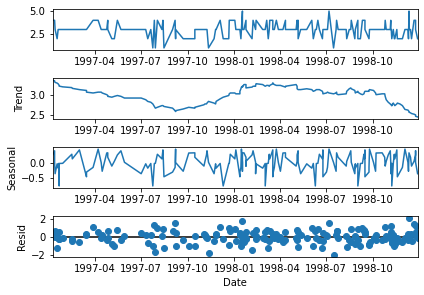

In [62]:
# Plot decomposition
fig = plt.figure()
s_mid.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

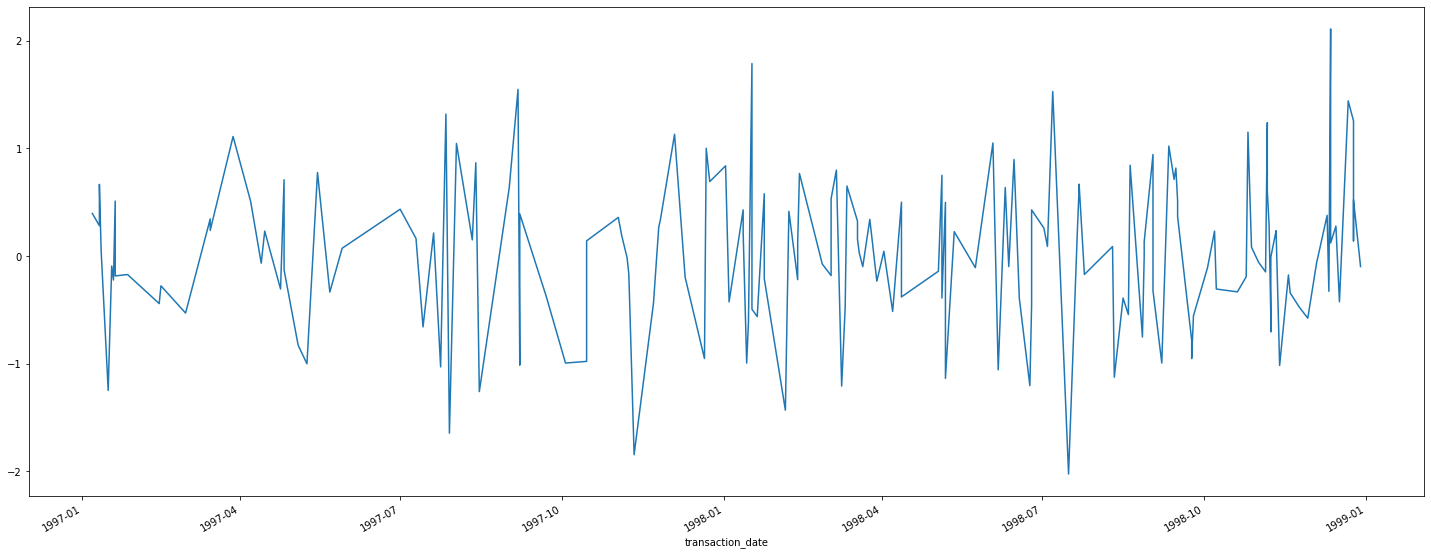

In [63]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_mid.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [64]:
print('the Standarad Deviation of the Demand data is', np.std(s_mid.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_mid.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_mid.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_mid.trend))
#print('the  Combined Standarad Deviation of the decomposed data is', 
 #     np.std(s_mid.resid)+np.std(s_mid.seasonal)+np.std(s_mid.trend))

the Standarad Deviation of the Demand data is 0.7813010394360838
the Standarad Deviation of the Error of the decomposed data is 0.7047324050531895
the Standarad Deviation of the Seasonal of the decomposed data is 0.2862798535854636
the Standarad Deviation of the Trend of the decomposed data is 0.22156352272206137


In [65]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_mid=172
n2_mid=172
n3_mid=172
com_count_mid=n1_mid+n2_mid+n3_mid
print('The Combined Untis are',com_count_mid)
x1_mid= np.mean(s_mid.seasonal)
print('The mean of the Seasonal is',x1_mid)
x2_mid=np.mean(s_mid.resid)
print('The mean of the Residuals is',x2_mid)
x3_mid= np.mean(s_mid.trend)
print('The mean of the Trend is',x3_mid)
s1_mid=np.std(s_mid.seasonal)**2
print('The Variance of the Seasonal is',s1_mid)
s2_mid=np.std(s_mid.resid)**2
print('The Variance of the Residuals is',s2_mid)
s3_mid=np.std(s_mid.trend)**2
print('The Variance of the Trend is',s3_mid)
com_mean_mid=(n1_mid*x1_mid+n2_mid*x2_mid+n3_mid*x3_mid)/(n1_mid+n2_mid+n3_mid)
print('The compound mean is',com_mean_mid)
result1_mid=n1_mid*(s1_mid+(x1_mid-com_mean_mid)**2)
print('The Deviation of the Seasonal is',result1_mid)
result2_mid=n2_mid*(s2_mid+(x2_mid-com_mean_mid)**2)
print('The Deviation of the Residual is',result2_mid)
result3_mid=n3_mid*(s3_mid+(x3_mid-com_mean_mid)**2)
print('The Deviation of the Trend is',result3_mid)
new_sd_mid= (result1_mid+result2_mid+result3_mid)/com_count_mid
print('The SD of after Calculating it Manually is',new_sd_mid)

The Combined Untis are 516
The mean of the Seasonal is 0.0016062777899821356
The mean of the Residuals is 0.018868423086323936
The mean of the Trend is 2.985339252612066
The Variance of the Seasonal is 0.08195615456891447
The Variance of the Residuals is 0.4966477627320527
The Variance of the Trend is 0.049090394601009404
The compound mean is 1.001937984496124
The Deviation of the Seasonal is 186.2105846178124
The Deviation of the Residual is 251.64864635203162
The Deviation of the Trend is 685.0710094139691
The SD of after Calculating it Manually is 2.1762213960926613


In [66]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_mid))
print('The highest demand of is',df_mid.max())
Seas_mid= df_mid.max()/np.mean(df_mid)
print('The Seasonal Fraction is',Seas_mid)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_mid.resid)*Seas_mid*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.005814
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.663443
dtype: float64
The new Standard Deviation is quantity    1.28951
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [67]:
# The seasonal data
print(s_mid.seasonal)

transaction_date
1997-01-07    0.243417
1997-01-11    0.375450
1997-01-11    0.010086
1997-01-12   -0.352673
1997-01-16   -0.038898
1997-01-18   -0.176130
1997-01-19   -0.027648
1997-01-20   -0.742261
1997-01-20   -0.028303
1997-01-27   -0.022678
1997-02-14    0.265685
1997-02-15    0.119524
1997-03-01    0.403751
1997-03-15   -0.450416
1997-03-15   -0.301607
1997-03-28   -0.152797
1997-04-07    0.429120
1997-04-13    0.002961
1997-04-15   -0.274389
1997-04-24    0.305404
1997-04-26    0.310792
1997-04-26    0.170347
1997-05-04   -0.109979
1997-05-09    0.041242
1997-05-15    0.243417
1997-05-22    0.375450
1997-05-29    0.010086
1997-07-01   -0.352673
1997-07-10   -0.038898
1997-07-14   -0.176130
1997-07-20   -0.027648
1997-07-24   -0.742261
1997-07-27   -0.028303
1997-07-29   -0.022678
1997-08-02    0.265685
1997-08-11    0.119524
1997-08-13    0.403751
1997-08-15   -0.450416
1997-09-01   -0.301607
1997-09-06   -0.152797
1997-09-07    0.429120
1997-09-07    0.002961
1997-09-22   -0.2

In [68]:
# Convert the Seasonal data into Dataframe
s_mid.seasonal
print(len(s_mid.seasonal))
sea_mid=pd.DataFrame(s_mid.seasonal)
print(sea_mid)

172
                  seasonal
transaction_date          
1997-01-07        0.243417
1997-01-11        0.375450
1997-01-11        0.010086
1997-01-12       -0.352673
1997-01-16       -0.038898
1997-01-18       -0.176130
1997-01-19       -0.027648
1997-01-20       -0.742261
1997-01-20       -0.028303
1997-01-27       -0.022678
1997-02-14        0.265685
1997-02-15        0.119524
1997-03-01        0.403751
1997-03-15       -0.450416
1997-03-15       -0.301607
1997-03-28       -0.152797
1997-04-07        0.429120
1997-04-13        0.002961
1997-04-15       -0.274389
1997-04-24        0.305404
1997-04-26        0.310792
1997-04-26        0.170347
1997-05-04       -0.109979
1997-05-09        0.041242
1997-05-15        0.243417
1997-05-22        0.375450
1997-05-29        0.010086
1997-07-01       -0.352673
1997-07-10       -0.038898
1997-07-14       -0.176130
1997-07-20       -0.027648
1997-07-24       -0.742261
1997-07-27       -0.028303
1997-07-29       -0.022678
1997-08-02        0.2656

##### Residuals

In [69]:
# Convert the residual data into Dataframe
print(len(s_mid.resid))
res_mid=np.array(s_mid.resid)
print(res_mid)
res_mid=pd.DataFrame(res_mid,columns=['Error'])
print(res_mid)

172
[ 0.39637446  0.28288375  0.66678886  0.04808981 -1.24714348 -0.09136967
 -0.22131015  0.51184461 -0.18357205 -0.17065539 -0.44047682 -0.27577443
 -0.52875062  0.34624938  0.23910652  1.11113033  0.50837972 -0.06546086
  0.23272237 -0.30540392  0.71004121 -0.12868032 -0.8275209  -0.99957576
  0.77741613 -0.33378292  0.0732472   0.43600648  0.16389818 -0.65720301
  0.21514818 -1.02857205  1.31996961 -1.64398872  1.04681485  0.1513089
  0.86708271 -1.25791729  0.63493985  1.54863033 -1.01245361  0.39287248
 -0.37144429 -0.99290392 -0.97745879  0.14215302  0.3599791   0.18792424
 -0.01425054 -0.16711625 -1.84341947 -0.43899352  0.26806485  0.34279699
  1.13181485 -0.19523872 -0.95086372  1.00184461  0.69264818  0.8388089
 -0.42458396  0.42958271  0.21827318 -0.99303634 -0.61662028  1.78870581
  0.08688904 -0.49290392 -0.56079212  0.57965302 -0.0775209  -0.2079091
 -1.4309172   0.41621708 -0.21841947  0.12350648  0.76806485 -0.07386967
 -0.18068515  0.53392795  0.79913628 -1.20648872 -

In [70]:
# There is 24 not available data for the residuals
print(res_mid.info())
print(type(res_mid))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   172 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [71]:
# Convert the Trend data into Dataframe
print(len(s_mid.trend))
tre_mid=np.array(s_mid.trend)
print(tre_mid)
tre_mid=pd.DataFrame(tre_mid,columns=['Trend'])
print(tre_mid)

172
[3.36020833 3.34166667 3.323125   3.30458333 3.28604167 3.2675
 3.24895833 3.23041667 3.211875   3.19333333 3.17479167 3.15625
 3.125      3.10416667 3.0625     3.04166667 3.0625     3.0625
 3.04166667 3.         2.97916667 2.95833333 2.9375     2.95833333
 2.97916667 2.95833333 2.91666667 2.91666667 2.875      2.83333333
 2.8125     2.77083333 2.70833333 2.66666667 2.6875     2.72916667
 2.72916667 2.70833333 2.66666667 2.60416667 2.58333333 2.60416667
 2.64583333 2.6875     2.66666667 2.6875     2.75       2.77083333
 2.77083333 2.79166667 2.83333333 2.79166667 2.77083333 2.83333333
 2.89583333 2.9375     2.97916667 3.02083333 3.04166667 3.04166667
 3.02083333 3.02083333 3.08333333 3.14583333 3.1875     3.20833333
 3.1875     3.1875     3.25       3.25       3.1875     3.16666667
 3.1875     3.20833333 3.20833333 3.22916667 3.27083333 3.25
 3.20833333 3.20833333 3.22916667 3.22916667 3.20833333 3.22916667
 3.27083333 3.29166667 3.27083333 3.25       3.22916667 3.22916667
 3.22916

In [72]:
# There is 24 not available data for the residuals
print(tre_mid.info())
print(type(tre_mid))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   172 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [73]:
csv_mid= pd.concat([sea_mid,df_mid],axis=1)
print(csv_mid)

                  seasonal  quantity
transaction_date                    
1997-01-07        0.243417         4
1997-01-11        0.375450         4
1997-01-11        0.010086         4
1997-01-12       -0.352673         3
1997-01-16       -0.038898         2
1997-01-18       -0.176130         3
1997-01-19       -0.027648         3
1997-01-20       -0.742261         3
1997-01-20       -0.028303         3
1997-01-27       -0.022678         3
1997-02-14        0.265685         3
1997-02-15        0.119524         3
1997-03-01        0.403751         3
1997-03-15       -0.450416         3
1997-03-15       -0.301607         3
1997-03-28       -0.152797         4
1997-04-07        0.429120         4
1997-04-13        0.002961         3
1997-04-15       -0.274389         3
1997-04-24        0.305404         3
1997-04-26        0.310792         4
1997-04-26        0.170347         3
1997-05-04       -0.109979         2
1997-05-09        0.041242         2
1997-05-15        0.243417         4
1

In [74]:
csv_mid=csv_mid.reset_index()
print(csv_mid)
new_csv_mid= pd.concat([csv_mid,res_mid,tre_mid],axis=1)
print(new_csv_mid.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-07  0.243417         4
1         1997-01-11  0.375450         4
2         1997-01-11  0.010086         4
3         1997-01-12 -0.352673         3
4         1997-01-16 -0.038898         2
5         1997-01-18 -0.176130         3
6         1997-01-19 -0.027648         3
7         1997-01-20 -0.742261         3
8         1997-01-20 -0.028303         3
9         1997-01-27 -0.022678         3
10        1997-02-14  0.265685         3
11        1997-02-15  0.119524         3
12        1997-03-01  0.403751         3
13        1997-03-15 -0.450416         3
14        1997-03-15 -0.301607         3
15        1997-03-28 -0.152797         4
16        1997-04-07  0.429120         4
17        1997-04-13  0.002961         3
18        1997-04-15 -0.274389         3
19        1997-04-24  0.305404         3
20        1997-04-26  0.310792         4
21        1997-04-26  0.170347         3
22        1997-05-04 -0.109979         2
23        1997-0

In [75]:
new_csv_mid['Added_Demand']= new_csv_mid['seasonal']+new_csv_mid['Error']+new_csv_mid['Trend']
new_csv_mid['Multiplied_Demand']= new_csv_mid['seasonal']*new_csv_mid['Error']*new_csv_mid['Trend']

In [76]:
new_csv_mid['quantity']=new_csv_mid['quantity'].astype('str')
new_csv_mid['Added_Demand']= new_csv_mid['Added_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_mid[['quantity','Added_Demand']])

    quantity Added_Demand
0          4          4.0
1          4          4.0
2          4          4.0
3          3          3.0
4          2          2.0
5          3          3.0
6          3          3.0
7          3          3.0
8          3          3.0
9          3          3.0
10         3          3.0
11         3          3.0
12         3          3.0
13         3          3.0
14         3          3.0
15         4          4.0
16         4          4.0
17         3          3.0
18         3          3.0
19         3          3.0
20         4          4.0
21         3          3.0
22         2          2.0
23         2          2.0
24         4          4.0
25         3          3.0
26         3          3.0
27         3          3.0
28         3          3.0
29         2          2.0
30         3          3.0
31         1          1.0
32         4          4.0
33         1          1.0
34         4          4.0
35         3          3.0
36         4          4.0
37         1

In [77]:
# Save the Data into CSV
new_csv_mid.to_csv(r'/csv_mid_product.csv')

### 25% product

In [78]:
s_per=sm.tsa.seasonal_decompose(df_per,freq=24, model='additive',extrapolate_trend='freq')

<ipython-input-78-36e3fdeeec2d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_per=sm.tsa.seasonal_decompose(df_per,freq=24, model='additive',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

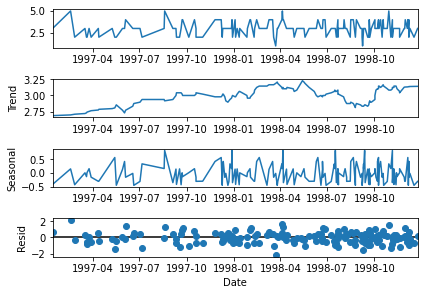

In [79]:
# Plot decomposition
fig = plt.figure()
s_per.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

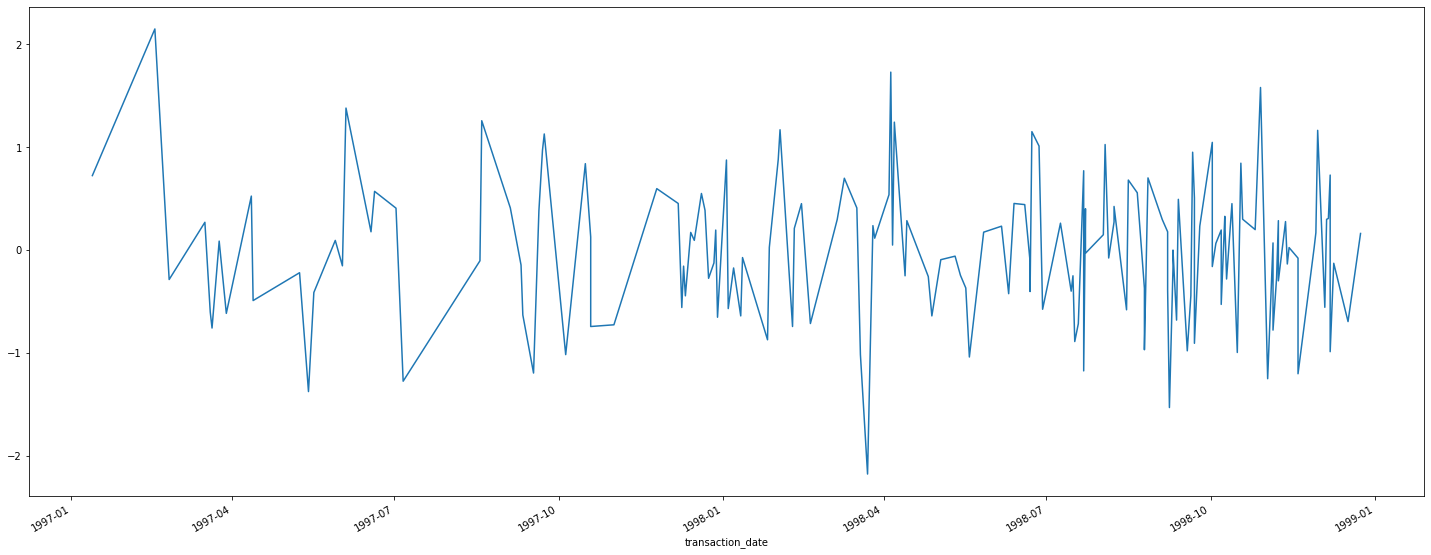

In [80]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_per.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [81]:
print('the Standarad Deviation of the Demand data is', np.std(s_per.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_per.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_per.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_per.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_per.resid)+np.std(s_per.seasonal)+np.std(s_per.trend))

the Standarad Deviation of the Demand data is 0.7634032014872285
the Standarad Deviation of the Error of the decomposed data is 0.6815265492857974
the Standarad Deviation of the Seasonal of the decomposed data is 0.3371256767934225
the Standarad Deviation of the Trend of the decomposed data is 0.12887441965845373
the  Combined Standarad Deviation of the decomposed data is 1.1475266457376736


In [82]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_per=163
n2_per=163
n3_per=163
com_count_per=n1_per+n2_per+n3_per
print('The Combined Untis are',com_count_per)
x1_per= np.mean(s_per.seasonal)
print('The mean of the Seasonal is',x1_per)
x2_per=np.mean(s_per.resid)
print('The mean of the Residuals is',x2_per)
x3_per= np.mean(s_per.trend)
print('The mean of the Trend is',x3_per)
s1_per=np.std(s_per.seasonal)**2
print('The Variance of the Seasonal is',s1_per)
s2_per=np.std(s_per.resid)**2
print('The Variance of the Residuals is',s2_per)
s3_per=np.std(s_per.trend)**2
print('The Variance of the Trend is',s3_per)
com_mean_per=(n1_per*x1_per+n2_per*x2_per+n3_per*x3_per)/(n1_per+n2_per+n3_per)
print('The compound mean is',com_mean_per)
result1_per=n1_per*(s1_per+(x1_per-com_mean_per)**2)
print('The Deviation of the Seasonal is',result1_per)
result2_per=n2_per*(s2_per+(x2_per-com_mean_per)**2)
print('The Deviation of the Residual is',result2_per)
result3_per=n3_per*(s3_per+(x3_per-com_mean_per)**2)
print('The Deviation of the Trend is',result3_per)
new_sd_per= (result1_per+result2_per+result3_per)/com_count_per
print('The SD of after Calculating it Manually is',new_sd_per)

The Combined Untis are 489
The mean of the Seasonal is -0.006968999052304607
The mean of the Residuals is -0.001494924660685476
The mean of the Trend is 3.0023289543878366
The Variance of the Seasonal is 0.11365372195342316
The Variance of the Residuals is 0.4644784373814064
The Variance of the Trend is 0.016608616042303244
The compound mean is 0.9979550102249488
The Deviation of the Seasonal is 183.13473577917267
The Deviation of the Residual is 238.5307133850617
The Deviation of the Trend is 657.5621344252671
The SD of after Calculating it Manually is 2.2070093733936638


In [83]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_per))
print('The highest demand of is',df_per.max())
Seas_per= df_per.max()/np.mean(df_per)
print('The Seasonal Fraction is',Seas_per)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_per.resid)*Seas_per*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    2.993865
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.670082
dtype: float64
The new Standard Deviation is quantity    1.252026
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [84]:
# The seasonal data
print(s_per.seasonal)

transaction_date
1997-01-13   -0.409159
1997-02-17    0.154758
1997-02-25   -0.421206
1997-03-17    0.011758
1997-03-20   -0.126706
1997-03-21    0.017569
1997-03-25    0.161843
1997-03-29   -0.146799
1997-04-12   -0.297336
1997-04-13   -0.293111
1997-05-09    0.425399
1997-05-14    0.569505
1997-05-17   -0.440357
1997-05-29    0.136856
1997-06-02    0.425378
1997-06-04   -0.149195
1997-06-18   -0.009482
1997-06-20   -0.444175
1997-07-02   -0.301486
1997-07-06    0.338300
1997-08-18    0.168162
1997-08-19    0.827884
1997-09-04   -0.345727
1997-09-10    0.147328
1997-09-11   -0.409159
1997-09-17    0.154758
1997-09-20   -0.421206
1997-09-22    0.011758
1997-09-23   -0.126706
1997-10-05    0.017569
1997-10-16    0.161843
1997-10-19   -0.146799
1997-10-19   -0.297336
1997-11-01   -0.293111
1997-11-25    0.425399
1997-12-07    0.569505
1997-12-09   -0.440357
1997-12-10    0.136856
1997-12-11    0.425378
1997-12-14   -0.149195
1997-12-16   -0.009482
1997-12-20   -0.444175
1997-12-22   -0.3

In [85]:
# Convert the Seasonal data into Dataframe
s_per.seasonal
print(len(s_per.seasonal))
sea_per=pd.DataFrame(s_per.seasonal)
print(sea_per)

163
                  seasonal
transaction_date          
1997-01-13       -0.409159
1997-02-17        0.154758
1997-02-25       -0.421206
1997-03-17        0.011758
1997-03-20       -0.126706
1997-03-21        0.017569
1997-03-25        0.161843
1997-03-29       -0.146799
1997-04-12       -0.297336
1997-04-13       -0.293111
1997-05-09        0.425399
1997-05-14        0.569505
1997-05-17       -0.440357
1997-05-29        0.136856
1997-06-02        0.425378
1997-06-04       -0.149195
1997-06-18       -0.009482
1997-06-20       -0.444175
1997-07-02       -0.301486
1997-07-06        0.338300
1997-08-18        0.168162
1997-08-19        0.827884
1997-09-04       -0.345727
1997-09-10        0.147328
1997-09-11       -0.409159
1997-09-17        0.154758
1997-09-20       -0.421206
1997-09-22        0.011758
1997-09-23       -0.126706
1997-10-05        0.017569
1997-10-16        0.161843
1997-10-19       -0.146799
1997-10-19       -0.297336
1997-11-01       -0.293111
1997-11-25        0.4253

##### Residuals

In [86]:
# Convert the residual data into Dataframe
print(len(s_per.resid))
res_per=np.array(s_per.resid)
print(res_per)
res_per=pd.DataFrame(res_per,columns=['Error'])
print(res_per)

163
[ 7.22081680e-01  2.14724990e+00 -2.87700929e-01  2.68419672e-01
 -6.04031157e-01 -7.59220080e-01  8.55909967e-02 -6.16682123e-01
  5.22940030e-01 -4.92199721e-01 -2.21625187e-01 -1.37664589e+00
 -4.13809452e-01  9.23111485e-02 -1.54544442e-01  1.37836187e+00
  1.76149140e-01  5.69174503e-01  4.05652246e-01 -1.27580048e+00
 -1.05661591e-01  1.25544952e+00  4.08227298e-01 -1.47328258e-01
 -6.32507692e-01 -1.19642462e+00  3.79539409e-01  9.67408198e-01
  1.12670556e+00 -1.01756851e+00  8.38157422e-01  1.25965824e-01
 -7.44330501e-01 -7.27722064e-01  5.95433992e-01  4.51328143e-01
 -5.59642785e-01 -1.57688852e-01 -4.46211108e-01  1.70028540e-01
  9.28158069e-02  5.48341169e-01  3.84818912e-01 -2.75800480e-01
 -1.26494925e-01  1.92949520e-01 -6.54272702e-01  8.73505075e-01
 -5.70007692e-01 -1.75591284e-01 -6.41293924e-01 -7.42584685e-02
 -8.73294442e-01  2.40981568e-02  8.79824088e-01  1.16763249e+00
 -7.44330501e-01  2.09777936e-01  4.49600659e-01 -7.15338524e-01
  2.94523881e-01  6.9

In [87]:
# There is 24 not available data for the residuals
print(res_per.info())
print(type(res_per))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   163 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [88]:
# Convert the Trend data into Dataframe
print(len(s_per.trend))
tre_per=np.array(s_per.trend)
print(tre_per)
tre_per=pd.DataFrame(tre_per,columns=['Trend'])
print(tre_per)

163
[2.68707729 2.69799215 2.708907   2.71982186 2.73073671 2.74165157
 2.75256643 2.76348128 2.77439614 2.78531099 2.79622585 2.8071407
 2.85416667 2.77083333 2.72916667 2.77083333 2.83333333 2.875
 2.89583333 2.9375     2.9375     2.91666667 2.9375     3.
 3.04166667 3.04166667 3.04166667 3.02083333 3.         3.
 3.         3.02083333 3.04166667 3.02083333 2.97916667 2.97916667
 3.         3.02083333 3.02083333 2.97916667 2.91666667 2.89583333
 2.91666667 2.9375     2.95833333 2.97916667 3.         2.97916667
 2.97916667 3.02083333 3.0625     3.0625     3.         2.95833333
 2.95833333 2.97916667 3.04166667 3.08333333 3.125      3.14583333
 3.14583333 3.16666667 3.16666667 3.16666667 3.1875     3.20833333
 3.1875     3.125      3.10416667 3.125      3.10416667 3.10416667
 3.125      3.10416667 3.0625     3.08333333 3.1875     3.22916667
 3.20833333 3.1875     3.125      3.0625     3.         2.97916667
 3.         2.97916667 2.97916667 3.         3.         3.02083333
 3.04166667 3

In [89]:
# There is 24 not available data for the residuals
print(tre_per.info())
print(type(tre_per))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   163 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [90]:
csv_per= pd.concat([sea_per,df_per],axis=1)
print(csv_per)

                  seasonal  quantity
transaction_date                    
1997-01-13       -0.409159         3
1997-02-17        0.154758         5
1997-02-25       -0.421206         2
1997-03-17        0.011758         3
1997-03-20       -0.126706         2
1997-03-21        0.017569         2
1997-03-25        0.161843         3
1997-03-29       -0.146799         2
1997-04-12       -0.297336         3
1997-04-13       -0.293111         2
1997-05-09        0.425399         3
1997-05-14        0.569505         2
1997-05-17       -0.440357         2
1997-05-29        0.136856         3
1997-06-02        0.425378         3
1997-06-04       -0.149195         4
1997-06-18       -0.009482         3
1997-06-20       -0.444175         3
1997-07-02       -0.301486         3
1997-07-06        0.338300         2
1997-08-18        0.168162         3
1997-08-19        0.827884         5
1997-09-04       -0.345727         3
1997-09-10        0.147328         3
1997-09-11       -0.409159         2
1

In [91]:
csv_per=csv_per.reset_index()
print(csv_per)
new_csv_per= pd.concat([csv_per,res_per,tre_per],axis=1)
print(new_csv_per.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-13 -0.409159         3
1         1997-02-17  0.154758         5
2         1997-02-25 -0.421206         2
3         1997-03-17  0.011758         3
4         1997-03-20 -0.126706         2
5         1997-03-21  0.017569         2
6         1997-03-25  0.161843         3
7         1997-03-29 -0.146799         2
8         1997-04-12 -0.297336         3
9         1997-04-13 -0.293111         2
10        1997-05-09  0.425399         3
11        1997-05-14  0.569505         2
12        1997-05-17 -0.440357         2
13        1997-05-29  0.136856         3
14        1997-06-02  0.425378         3
15        1997-06-04 -0.149195         4
16        1997-06-18 -0.009482         3
17        1997-06-20 -0.444175         3
18        1997-07-02 -0.301486         3
19        1997-07-06  0.338300         2
20        1997-08-18  0.168162         3
21        1997-08-19  0.827884         5
22        1997-09-04 -0.345727         3
23        1997-0

In [92]:
new_csv_per['Added_Demand']= new_csv_per['seasonal']+new_csv_per['Error']+new_csv_per['Trend']
new_csv_per['Multiplied_Demand']= new_csv_per['seasonal']*new_csv_per['Error']*new_csv_per['Trend']

In [93]:
new_csv_per['quantity']=new_csv_per['quantity'].astype('str')
new_csv_per['Added_Demand']= new_csv_per['Added_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_per[['quantity','Added_Demand']])

    quantity Added_Demand
0          3          3.0
1          5          5.0
2          2          2.0
3          3          3.0
4          2          2.0
5          2          2.0
6          3          3.0
7          2          2.0
8          3          3.0
9          2          2.0
10         3          3.0
11         2          2.0
12         2          2.0
13         3          3.0
14         3          3.0
15         4          4.0
16         3          3.0
17         3          3.0
18         3          3.0
19         2          2.0
20         3          3.0
21         5          5.0
22         3          3.0
23         3          3.0
24         2          2.0
25         2          2.0
26         3          3.0
27         4          4.0
28         4          4.0
29         2          2.0
30         4          4.0
31         3          3.0
32         2          2.0
33         2          2.0
34         4          4.0
35         4          4.0
36         2          2.0
37         3

In [94]:
# Save the Data into CSV
new_csv_per.to_csv(r'/csv_25_product.csv')

### 75% product

In [95]:
s_ver=sm.tsa.seasonal_decompose(df_ver,freq=24, model='additive',extrapolate_trend='freq')

<ipython-input-95-f5a342920760>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s_ver=sm.tsa.seasonal_decompose(df_ver,freq=24, model='additive',extrapolate_trend='freq')


<Figure size 576x2160 with 0 Axes>

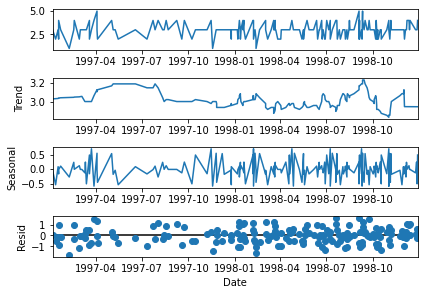

In [96]:
# Plot decomposition
fig = plt.figure()
s_ver.plot()
plt.xlabel('Date')
fig.set_figheight(30)
fig.set_figwidth(8)
plt.show()

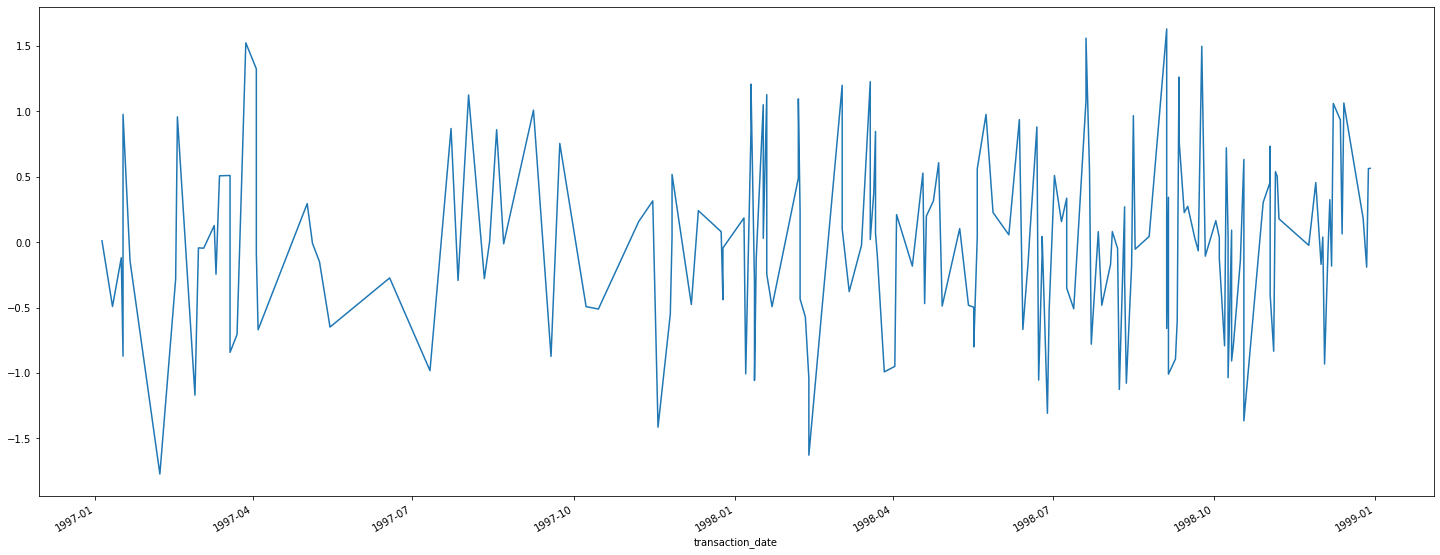

In [97]:
# Plot the residual alone
plt.figure(figsize=(25,10))
s_ver.resid.plot()
plt.show()

#### Calculate the SD of the Error and the Factor of the Seasonality and add the Trend =1.1

In [98]:
print('the Standarad Deviation of the Demand data is', np.std(s_ver.observed))
print('the Standarad Deviation of the Error of the decomposed data is', np.std(s_ver.resid))
print('the Standarad Deviation of the Seasonal of the decomposed data is', np.std(s_ver.seasonal))
print('the Standarad Deviation of the Trend of the decomposed data is', np.std(s_ver.trend))
print('the  Combined Standarad Deviation of the decomposed data is', 
      np.std(s_ver.resid)+np.std(s_ver.seasonal)+np.std(s_ver.trend))

the Standarad Deviation of the Demand data is 0.7552392615290928
the Standarad Deviation of the Error of the decomposed data is 0.6792915197130904
the Standarad Deviation of the Seasonal of the decomposed data is 0.3324255948549586
the Standarad Deviation of the Trend of the decomposed data is 0.08246242323430085
the  Combined Standarad Deviation of the decomposed data is 1.0941795378023498


In [99]:
# Calculate the combined SD of the three ( Error, Season, Trend), 
# Using this website: https://www.emathzone.com/tutorials/basic-statistics/combined-variance.html
n1_ver=184
n2_ver=184
n3_ver=184
com_count_ver=n1_ver+n2_ver+n3_ver
print('The Combined Untis are',com_count_ver)
x1_ver= np.mean(s_ver.seasonal)
print('The mean of the Seasonal is',x1_ver)
x2_ver=np.mean(s_ver.resid)
print('The mean of the Residuals is',x2_ver)
x3_ver= np.mean(s_ver.trend)
print('The mean of the Trend is',x3_ver)
s1_ver=np.std(s_ver.seasonal)**2
print('The Variance of the Seasonal is',s1_ver)
s2_ver=np.std(s_ver.resid)**2
print('The Variance of the Residuals is',s2_ver)
s3_ver=np.std(s_ver.trend)**2
print('The Variance of the Trend is',s3_ver)
com_mean_ver=(n1_ver*x1_ver+n2_ver*x2_ver+n3_ver*x3_ver)/(n1_ver+n2_ver+n3_ver)
print('The compound mean is',com_mean_ver)
result1_ver=n1_ver*(s1_ver+(x1_ver-com_mean_ver)**2)
print('The Deviation of the Seasonal is',result1_ver)
result2_ver=n2_ver*(s2_ver+(x2_ver-com_mean_ver)**2)
print('The Deviation of the Residual is',result2_ver)
result3_ver=n3_ver*(s3_ver+(x3_ver-com_mean_ver)**2)
print('The Deviation of the Trend is',result3_ver)
new_sd_ver= (result1_ver+result2_ver+result3_ver)/com_count_ver
print('The SD of after Calculating it Manually is',new_sd_ver)

The Combined Untis are 552
The mean of the Seasonal is -0.0021621012289209985
The mean of the Residuals is 0.008679409830055251
The mean of the Trend is 3.009787039224953
The Variance of the Seasonal is 0.11050677611467308
The Variance of the Residuals is 0.46143696875411994
The Variance of the Trend is 0.006800051245672961
The compound mean is 1.0054347826086956
The Deviation of the Seasonal is 207.13951918384655
The Deviation of the Residual is 267.71231651276594
The Deviation of the Trend is 740.4579556520973
The SD of after Calculating it Manually is 2.20164817273317


In [100]:
# the Standard Deviation of the combined decomposed data is not equal to the SD of the Demand
print('The mean of the demand is',np.mean(df_ver))
print('The highest demand of is',df_ver.max())
Seas_ver= df_high.max()/np.mean(df_ver)
print('The Seasonal Fraction is',Seas_ver)
# the trend(Growth rate is 1.1)
print('The new Standard Deviation is',np.std(s_ver.resid)*Seas_ver*1.1)
# The new Standard Deviation is less than the SD of the Demand , and the Combined Standard Deviations

The mean of the demand is quantity    3.016304
dtype: float64
The highest demand of is quantity    5
dtype: int64
The Seasonal Fraction is quantity    1.657658
dtype: float64
The new Standard Deviation is quantity    1.238636
dtype: float64


#### Get the Seasonal, Trend, Error Data for the Highest one

##### Seasonal

In [101]:
# The seasonal data
print(s_ver.seasonal)

transaction_date
1997-01-05   -0.038224
1997-01-11   -0.538527
1997-01-16    0.086169
1997-01-17   -0.164134
1997-01-17   -0.014452
1997-01-21    0.105046
1997-02-07   -0.270247
1997-02-16    0.237272
1997-02-17   -0.005208
1997-02-27    0.119498
1997-03-01   -0.008399
1997-03-04   -0.008692
1997-03-10   -0.126841
1997-03-11    0.245565
1997-03-13   -0.507029
1997-03-19    0.490377
1997-03-19   -0.157489
1997-03-23    0.705606
1997-03-28   -0.586060
1997-04-03    0.550844
1997-04-03   -0.020584
1997-04-04   -0.455108
1997-05-02    0.538940
1997-05-05   -0.178322
1997-05-09   -0.038224
1997-05-15   -0.538527
1997-06-18    0.086169
1997-07-11   -0.164134
1997-07-23   -0.014452
1997-07-27    0.105046
1997-08-02   -0.270247
1997-08-11    0.237272
1997-08-14   -0.005208
1997-08-18    0.119498
1997-08-22   -0.008399
1997-09-08   -0.008692
1997-09-18   -0.126841
1997-09-23    0.245565
1997-10-08   -0.507029
1997-10-15    0.490377
1997-11-07   -0.157489
1997-11-15    0.705606
1997-11-18   -0.5

In [102]:
# Convert the Seasonal data into Dataframe
s_ver.seasonal
print(len(s_ver.seasonal))
sea_ver=pd.DataFrame(s_ver.seasonal)
print(sea_ver)

184
                  seasonal
transaction_date          
1997-01-05       -0.038224
1997-01-11       -0.538527
1997-01-16        0.086169
1997-01-17       -0.164134
1997-01-17       -0.014452
1997-01-21        0.105046
1997-02-07       -0.270247
1997-02-16        0.237272
1997-02-17       -0.005208
1997-02-27        0.119498
1997-03-01       -0.008399
1997-03-04       -0.008692
1997-03-10       -0.126841
1997-03-11        0.245565
1997-03-13       -0.507029
1997-03-19        0.490377
1997-03-19       -0.157489
1997-03-23        0.705606
1997-03-28       -0.586060
1997-04-03        0.550844
1997-04-03       -0.020584
1997-04-04       -0.455108
1997-05-02        0.538940
1997-05-05       -0.178322
1997-05-09       -0.038224
1997-05-15       -0.538527
1997-06-18        0.086169
1997-07-11       -0.164134
1997-07-23       -0.014452
1997-07-27        0.105046
1997-08-02       -0.270247
1997-08-11        0.237272
1997-08-14       -0.005208
1997-08-18        0.119498
1997-08-22       -0.0083

##### Residuals

In [103]:
# Convert the residual data into Dataframe
print(len(s_ver.resid))
res_ver=np.array(s_ver.resid)
print(res_ver)
res_ver=pd.DataFrame(res_ver,columns=['Error'])
print(res_ver)

184
[ 0.01020153 -0.49192257 -0.11904666 -0.87117076  0.97671949 -0.14520646
 -1.77234074 -0.28228753  0.95776569 -1.1693686  -0.04389872 -0.046033
  0.1268414  -0.24556463  0.50702935  0.50962333 -0.84251107 -0.7056063
  1.52356036  1.3241556  -0.08358249 -0.66989202  0.2943937  -0.00917773
 -0.14927613 -0.64897269 -0.27366925 -0.98169914  0.86861865 -0.29254644
  1.12441348 -0.2789391   0.00520832  0.85966824 -0.01243434  1.00869224
 -0.8731586   0.75443537 -0.49297065 -0.51121001  0.15748893  0.31522703
 -1.41393964 -0.5508444   0.04141751  0.51760798 -0.47643964  0.24082227
  0.07989054 -0.44063936 -0.04450258  0.18496753 -1.00638135  0.8532869
  1.20774682 -0.32060577 -1.05729168 -0.11949843  1.05006566  0.02952558
  1.1268414  -0.24556463 -0.49297065  0.48878999  1.09498893  0.2318937
 -0.43477297 -0.57167773 -1.04191583 -1.62822535 -0.5806063   1.1991556
  0.10072387 -0.37813936 -0.02366925  1.2266342   0.11861865  0.01995356
  0.37441348  0.8460609   0.06770832 -0.0986651  -0.9

In [104]:
# There is 24 not available data for the residuals
print(res_ver.info())
print(type(res_ver))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Error   184 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>


##### Trend

In [105]:
# Convert the Trend data into Dataframe
print(len(s_ver.trend))
tre_ver=np.array(s_ver.trend)
print(tre_ver)
tre_ver=pd.DataFrame(tre_ver,columns=['Trend'])
print(tre_ver)

184
[3.02802234 3.03044988 3.03287742 3.03530495 3.03773249 3.04016002
 3.04258756 3.0450151  3.04744263 3.04987017 3.05229771 3.05472524
 3.         3.         3.         3.         3.         3.
 3.0625     3.125      3.10416667 3.125      3.16666667 3.1875
 3.1875     3.1875     3.1875     3.14583333 3.14583333 3.1875
 3.14583333 3.04166667 3.         3.02083333 3.02083333 3.
 3.         3.         3.         3.02083333 3.         2.97916667
 3.         3.         2.97916667 2.9375     2.9375     2.9375
 2.95833333 2.97916667 2.95833333 2.97916667 3.02083333 3.04166667
 3.0625     3.08333333 3.0625     3.         2.95833333 2.97916667
 3.         3.         3.         3.02083333 3.0625     3.0625
 3.02083333 3.02083333 3.0625     3.08333333 3.04166667 2.97916667
 2.9375     2.91666667 2.9375     2.9375     2.89583333 2.875
 2.89583333 2.91666667 2.9375     2.97916667 3.         2.95833333
 2.91666667 2.9375     2.97916667 2.97916667 2.95833333 2.97916667
 2.97916667 2.9375     2.916

In [106]:
# There is 24 not available data for the residuals
print(tre_ver.info())
print(type(tre_ver))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trend   184 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
None
<class 'pandas.core.frame.DataFrame'>


#### Combine all DataFrames and download it as CSV

In [107]:
csv_ver= pd.concat([sea_ver,df_ver],axis=1)
print(csv_ver)

                  seasonal  quantity
transaction_date                    
1997-01-05       -0.038224         3
1997-01-11       -0.538527         2
1997-01-16        0.086169         3
1997-01-17       -0.164134         2
1997-01-17       -0.014452         4
1997-01-21        0.105046         3
1997-02-07       -0.270247         1
1997-02-16        0.237272         3
1997-02-17       -0.005208         4
1997-02-27        0.119498         2
1997-03-01       -0.008399         3
1997-03-04       -0.008692         3
1997-03-10       -0.126841         3
1997-03-11        0.245565         3
1997-03-13       -0.507029         3
1997-03-19        0.490377         4
1997-03-19       -0.157489         2
1997-03-23        0.705606         3
1997-03-28       -0.586060         4
1997-04-03        0.550844         5
1997-04-03       -0.020584         3
1997-04-04       -0.455108         2
1997-05-02        0.538940         4
1997-05-05       -0.178322         3
1997-05-09       -0.038224         3
1

In [108]:
csv_ver=csv_ver.reset_index()
print(csv_ver)
new_csv_ver= pd.concat([csv_ver,res_ver,tre_ver],axis=1)
print(new_csv_ver.iloc[50:70,])

    transaction_date  seasonal  quantity
0         1997-01-05 -0.038224         3
1         1997-01-11 -0.538527         2
2         1997-01-16  0.086169         3
3         1997-01-17 -0.164134         2
4         1997-01-17 -0.014452         4
5         1997-01-21  0.105046         3
6         1997-02-07 -0.270247         1
7         1997-02-16  0.237272         3
8         1997-02-17 -0.005208         4
9         1997-02-27  0.119498         2
10        1997-03-01 -0.008399         3
11        1997-03-04 -0.008692         3
12        1997-03-10 -0.126841         3
13        1997-03-11  0.245565         3
14        1997-03-13 -0.507029         3
15        1997-03-19  0.490377         4
16        1997-03-19 -0.157489         2
17        1997-03-23  0.705606         3
18        1997-03-28 -0.586060         4
19        1997-04-03  0.550844         5
20        1997-04-03 -0.020584         3
21        1997-04-04 -0.455108         2
22        1997-05-02  0.538940         4
23        1997-0

In [109]:
new_csv_ver['Added_Demand']= new_csv_ver['seasonal']+new_csv_ver['Error']+new_csv_ver['Trend']
new_csv_ver['Multiplied_Demand']= new_csv_ver['seasonal']*new_csv_ver['Error']*new_csv_ver['Trend']

In [110]:
new_csv_ver['quantity']=new_csv_ver['quantity'].astype('str')
new_csv_ver['Added_Demand']= new_csv_ver['Added_Demand'].astype('str')
pd.set_option('display.max_rows', None)
print(new_csv_ver[['quantity','Added_Demand']])

    quantity Added_Demand
0          3          3.0
1          2          2.0
2          3          3.0
3          2          2.0
4          4          4.0
5          3          3.0
6          1          1.0
7          3          3.0
8          4          4.0
9          2          2.0
10         3          3.0
11         3          3.0
12         3          3.0
13         3          3.0
14         3          3.0
15         4          4.0
16         2          2.0
17         3          3.0
18         4          4.0
19         5          5.0
20         3          3.0
21         2          2.0
22         4          4.0
23         3          3.0
24         3          3.0
25         2          2.0
26         3          3.0
27         2          2.0
28         4          4.0
29         3          3.0
30         4          4.0
31         3          3.0
32         3          3.0
33         4          4.0
34         3          3.0
35         4          4.0
36         2          2.0
37         4

In [111]:
# Save the Data into CSV
new_csv_ver.to_csv(r'/csv_75_product.csv')